In [53]:
import xml.etree.ElementTree as ET
import sys
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
annotation_list = os.listdir("/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/Annotations")
class_list = os.listdir("/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/SegmentationClass")
print(len(annotation_list), len(class_list))

# [Tast 1] Filter image names which contains person

In [ ]:
person_list = []

for l in annotation_list:
    ann_name, _ = os.path.splitext(l)
    
    for c in class_list:
        class_name, _ = os.path.splitext(c)
        if ann_name == class_name:
            #print(l)

            tree = ET.parse('/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/Annotations/'+l)
            root = tree.getroot()
            
            for obj in root.findall('object'):
                if obj.find('name').text == 'person':
                    #print(True)
                    person_list.append(l)

In [ ]:
len(person_list)

## then save to txt file

In [ ]:
with open('/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/person.txt', 'a') as fw:
    for person in person_list:
        fw.write(person+"\n")

# [Task 2] Filter image names which contains person

In [ ]:
non_person_list = []

for l in annotation_list:
    ann_name, _ = os.path.splitext(l)
    
    for c in class_list:
        class_name, _ = os.path.splitext(c)
        if ann_name == class_name:
            #print(l)

            tree = ET.parse('/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/Annotations/'+l)
            root = tree.getroot()
            
            object_name_list = []
            for obj in root.findall('object'):
                object_name_list.append(obj.find('name').text)
                
                if 'person' not in object_name_list:
                    #print(True)
                    non_person_list.append(l)

In [ ]:
len(non_person_list)

## then save to txt file

In [ ]:
with open('/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/non_person.txt', 'a') as fw:
    for non_person in non_person_list:
        fw.write(non_person+"\n")

# Check how many numbers are there

In [2]:
with open('/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/ImageSets/Main/person_train.txt', 'r') as rt:
    train_data = rt.readlines()

In [26]:
print(train_data[0][-2])

1


# Read person image

/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/JPEGImages/2008_000008.jpg


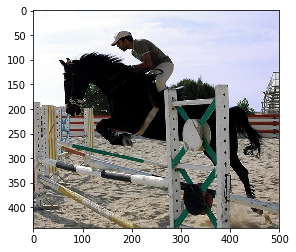

In [49]:
for img_name in train_data:
    if int(img_name[-3:-1]) >= 1:
        dir_path = '/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/JPEGImages/'
        file_with_path = dir_path + img_name[:11] + '.jpg'
        print(file_with_path)
        try:
            img_cv = cv2.imread(file_with_path)
            plt.imshow(img_cv[...,::-1])
        except:
            print('There is no image')

        break

# Read mask image

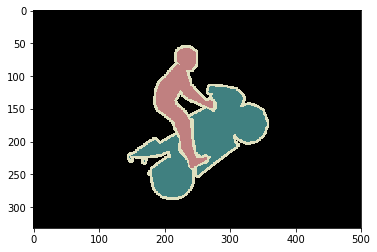

In [63]:
for img_name in train_data:
    if int(img_name[-3:-1]) >= 1:
        dir_path = '/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/JPEGImages/'
        file_with_path = dir_path + img_name[:11] + '.jpg'
        
        mask_dir_path = '/Users/pure/Developments/Personal-Study/Machine-Learning/Data/VOC2012/SegmentationClass/'
        mask_with_path = mask_dir_path + img_name[:11] + '.png'
        #print(file_with_path)
        
        img_cv = cv2.imread(file_with_path)
        mask_cv = cv2.imread(mask_with_path)
        #print(img_cv)
        
        if mask_cv is not None:
            plt.imshow(mask_cv[...,::-1])
            #plt.imshow(img_cv[...,::-1])
            break

In [64]:
print(img_cv.shape)
print(mask_cv.shape)

(332, 500, 3)
(332, 500, 3)


In [69]:
mask = mask_cv[mask_cv > 0] == 1

ValueError: cannot reshape array of size 69756 into shape (332,500,3)

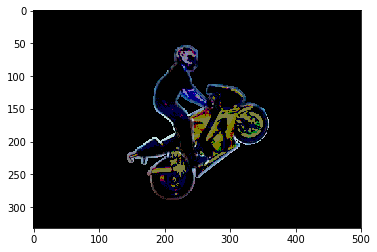

In [70]:
plt.imshow(cv2.bitwise_and(img_cv, mask_cv))